In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import collections
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
plt.style.use('ggplot')

In [22]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stop_words = set(stopwords.words('english'))
stemer = PorterStemmer()

In [24]:
COLUMNS = ['news', 'Assassination','Hijacking','Kidnapping','Barricade Incident','Bombing/Explosion','Armed Assault','Unarmed Assault','Facility/Infrastructure Attack','Unknown']
input_path = '/Users/shahreenshahjahanpsyche/Desktop/SATP-Event-Classification/Data_MachineLearning/action_type_data.csv'
df = pd.read_csv(input_path, header=[0])
df.head(10)

,news,Assassination,Hijacking,Kidnapping,Barricade Incident,Bombing/Explosion,Armed Assault,Unarmed Assault,Facility/Infrastructure Attack,Unknown
0,Two Lashkar e Jhangvi LeJ militants Asim alias...,False,False,False,False,False,True,False,False,False
1,The Commander Southern Command Lieutenant Gene...,False,False,False,False,False,False,False,False,True
2,Meanwhile the underground organization Manipur...,False,False,False,False,True,False,False,False,False
3,Islamic State IS in the latest issue of its on...,False,False,False,False,False,True,False,False,False
4,A senior Muttahida Qaumi Movement MQM worker i...,True,False,False,False,False,False,False,False,False
5,The ongoing construction work of an interstate...,False,False,False,False,False,False,False,True,False
6,Two civilians were injured when unidentified a...,False,False,False,False,False,True,False,False,False
7,More than a week after a woman Communist Party...,False,False,False,False,False,True,False,False,False
8,Three boys sustained injuries when a landmine ...,False,False,False,False,True,False,False,False,False
9,Unidentified militants shot dead a Frontier Co...,True,False,False,False,False,False,False,False,False


/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


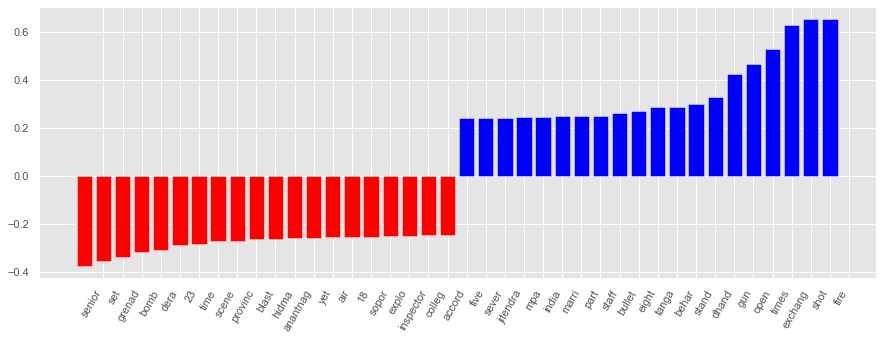

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt



data = df['news']
# print(data)
target = df['Armed Assault']

def replace(text):
    text_list = text.split()
#     print(text_list)
    for i in range(len(text_list)):
        if text_list[i] == 'ieds':
            print("Hello")
            text_list[i] = 'ied'
            print(text_list[i])
    text = ' '.join(text_list)
    return text

def get_stem(text):
    stemmer = nltk.porter.PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

def remove_stopwords(text):
    # convert sentence into token of words
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    # check in lowercase 
    t = [token for token in tokens if token.lower() not in stopword_list]
    text = ' '.join(t)    
    return text

def to_lowercase(text):
    return text.lower()

def process_text(text):
    text = to_lowercase(text)
    text = get_stem(text)
    text = remove_stopwords(text)
    text = replace(text)
    return text

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

for d in range(len(data)):
    data[d] = process_text(data[d])

cv = CountVectorizer()
cv.fit(data)
# print(len(cv.vocabulary_))
# print(cv.get_feature_names())
X_train = cv.transform(data)

svm = LinearSVC()
svm.fit(X_train, target)
plot_coefficients(svm, cv.get_feature_names())

In [40]:
coef = svm.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-20:]
feature_names = cv.get_feature_names()
feature_names = np.array(feature_names)

wordDict = {'words' : feature_names[top_positive_coefficients], 'coeff':coef[top_positive_coefficients]}
wordDf = pd.DataFrame(wordDict)
# print(feature_names[top_positive_coefficients])
# print(coef[top_positive_coefficients])

wordDf


,words,coeff
0,five,0.240809
1,sever,0.241416
2,jitendra,0.242766
3,mpa,0.243494
4,india,0.246042
5,marri,0.248977
6,part,0.249575
7,staff,0.249703
8,bullet,0.262402
9,eight,0.272045


# Miscellenious Code

In [20]:
from collections import Counter

Counter(df['is_relevant'])

KeyError: 'is_relevant'

In [9]:
df = df.loc[:, ['is_relevant', 'news']]
df.head(10)

,is_relevant,news
0,True,Two Lashkar e Jhangvi LeJ militants Asim alias...
1,True,The Commander Southern Command Lieutenant Gene...
2,True,Meanwhile the underground organization Manipur...
3,True,Islamic State IS in the latest issue of its on...
4,True,A senior Muttahida Qaumi Movement MQM worker i...
5,True,The ongoing construction work of an interstate...
6,True,Two civilians were injured when unidentified a...
7,True,More than a week after a woman Communist Party...
8,True,Three boys sustained injuries when a landmine ...
9,True,Unidentified militants shot dead a Frontier Co...


In [10]:
output_path = '/Users/shahreenshahjahanpsyche/Desktop/SATP-Event-Classification/Data_MachineLearning'

df.to_csv(output_path+'/is_relevant_data.csv', header = True, index = False)
